<a href="https://colab.research.google.com/github/rahuljungbahadur/hands_on_ml_book/blob/main/fashionMNIST_transferLearning_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning for FashionMNIST 

Creating a Fashion MNIST model using `keras.models.Sequential`

In [92]:
from tensorflow.keras.datasets import fashion_mnist

In [93]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Splitting the dataset

Split the data so that the `main` part has all but 2 labels. The `tl` part would be used for transfer learning and would have the remaining 2 classes

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Let's set classes 8 and 9 for `transfer learning`

In [96]:
## Building the main train data subset

main_choices = np.logical_not(np.isin(y_train, [6,7]))
X_train_main = X_train[main_choices]
y_train_main = y_train[main_choices]

In [97]:
X_train_main.shape

(48000, 28, 28)

In [98]:
y_train_main.shape

(48000,)

In [99]:
## main validation subset
main_valid_choices = np.logical_not(np.isin(y_test, [6,7]))
X_test_main = X_test[main_valid_choices]
y_test_main = y_test[main_valid_choices]

In [100]:
## transfer-learning training data subset 
tl_train_choices = np.isin(y_train, [6,7])
X_train_tl = X_train[tl_train_choices]
y_train_tl = y_train[tl_train_choices]

In [101]:
## transfer-learning validation data subset
tl_valid_choices = np.isin(y_test, [6,7])
X_test_tl = X_test[tl_valid_choices]
y_test_tl = y_test[tl_valid_choices]

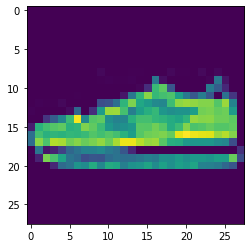

In [102]:
## Testing sample
plt.imshow(X_train_tl[8])

In [103]:
np.unique(y_train_tl)

array([6, 7], dtype=uint8)

In [104]:
y_train_tl = np.where(y_train_tl==6, 0, 1)


In [105]:
y_train_tl = y_train_tl.astype(int)

In [106]:
y_test_tl = np.where(y_test_tl==6, 0, 1)

In [107]:
y_test_tl = y_test_tl.astype(int)

In [108]:
np.unique(y_train_main)  ## Convert 8 and 9 to 6 and 7

array([0, 1, 2, 3, 4, 5, 8, 9], dtype=uint8)

In [109]:
y_train_main=np.where(y_train_main>6, y_train_main-2, y_train_main)
y_test_main = np.where(y_test_main>6, y_test_main-2, y_test_main)

## Create Sequential model

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.activations import elu, softmax

In [111]:
from tensorflow.python.keras import activations
## model

main_model = Sequential()

# main_model.add(Input(shape=[28, 28]))
## Flatten it
main_model.add(Flatten(input_shape=[28,28]))

## batchNormalize
main_model.add(BatchNormalization())

## Hidden1

main_model.add(Dense(500, activation=elu, kernel_initializer='he_normal', use_bias=False))

## BN2

main_model.add(BatchNormalization())

##hidden2
main_model.add(Dense(300, activation=elu, kernel_initializer='he_normal', use_bias=False))

##BN3
main_model.add(BatchNormalization())

## Hidden3
main_model.add(Dense(100, activation=elu, kernel_initializer='he_normal', use_bias=False))

##BN4
main_model.add(BatchNormalization())

## Hidden4
main_model.add(Dense(50, activation=elu, kernel_initializer='he_normal', use_bias=False))

## Hidden5
main_model.add(Dense(8, activation=softmax))

In [112]:
main_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [113]:
main_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_13 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 500)               392000    
                                                                 
 batch_normalization_14 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dense_19 (Dense)            (None, 300)               150000    
                                                                 
 batch_normalization_15 (Bat  (None, 300)             

In [114]:
## Modify y to be categorical

from tensorflow.keras.utils import to_categorical

In [115]:
y_train_main = to_categorical(y_train_main, num_classes=8)
y_test_main = to_categorical(y_test_main, num_classes=8)

In [116]:
early_stop = EarlyStopping(patience=2)
model_cp = ModelCheckpoint(filepath='/saved_models/FashionMNISTSeq.h5', save_best_only=True)

In [117]:
main_model.fit(x=X_train_main, y=y_train_main, batch_size=32, epochs=15, callbacks=[early_stop, model_cp], validation_data=(X_test_main, y_test_main))

Epoch 1/15
1500/1500 [==============================] - 19s 12ms/step - loss: 0.3072 - accuracy: 0.8942 - val_loss: 0.2434 - val_accuracy: 0.9140
Epoch 2/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2271 - accuracy: 0.9214 - val_loss: 0.2285 - val_accuracy: 0.9186
Epoch 3/15
1500/1500 [==============================] - 17s 12ms/step - loss: 0.2007 - accuracy: 0.9289 - val_loss: 0.2400 - val_accuracy: 0.9165
Epoch 4/15
1500/1500 [==============================] - 17s 12ms/step - loss: 0.1820 - accuracy: 0.9344 - val_loss: 0.2298 - val_accuracy: 0.9245


## Model evaluation


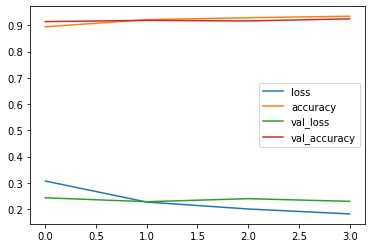

In [118]:
pd.DataFrame(main_model.history.history).plot(kind='line')

In [119]:
main_model.layers

## Create tl_model

This `transfer-learning` model would be using the n-1 layers of the `main-model`


In [120]:
tl_model = Sequential(main_model.layers[:-1])

In [121]:
tl_model.layers

The main model needs to be cloned as making and modifying a copy of it also changes the source model

In [122]:
from tensorflow.keras.models import clone_model

In [123]:
# from tensorflow.python.keras.models import clone_model
main_model_clone = clone_model(main_model)
main_model_clone.set_weights(main_model.get_weights())

In [124]:
# main_model.get_weights()[-3].shape

In [125]:
for layer in tl_model.layers:
  layer.trainable=False


In [126]:
## Add the last layer for tl-model
tl_model.add(Dense(units=1, activation='sigmoid'))

In [127]:
tl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train the transfer-learning model for a few epochs

This is done to train the weights/biases of the last layer. The previous layers are all set to `trainable=False`. This is done so that the model is not very sensitive to the large gradients that will occur when it is used to train on a task for which it was not designed for. Later on, we can set the initial layers to be trainable as well and run it for a few more epochs

In [128]:
main_model_clone.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_13 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 500)               392000    
                                                                 
 batch_normalization_14 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dense_19 (Dense)            (None, 300)               150000    
                                                                 
 batch_normalization_15 (Bat  (None, 300)             

In [129]:
tl_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_13 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 500)               392000    
                                                                 
 batch_normalization_14 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dense_19 (Dense)            (None, 300)               150000    
                                                                 
 batch_normalization_15 (Bat  (None, 300)             

In [130]:
tl_model.fit(x=X_train_tl, y=y_train_tl, epochs=2, batch_size=32, validation_data=(X_test_tl, y_test_tl))

Epoch 1/2
375/375 [==============================] - 3s 5ms/step - loss: 0.1051 - accuracy: 0.9667 - val_loss: 0.0211 - val_accuracy: 0.9990
Epoch 2/2
375/375 [==============================] - 2s 5ms/step - loss: 0.0156 - accuracy: 0.9977 - val_loss: 0.0092 - val_accuracy: 0.9995


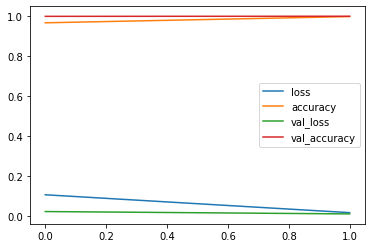

In [131]:
pd.DataFrame(tl_model.history.history).plot(kind='line')

## Conclusion

With just 2 epochs, we were able to get 99.95% accuracy for our `Shirt` and `Sneakers` set. This is amazing.